In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data_1.txt')

In [3]:
df.head()

,Quarter_ID,Stock_ID,feature_1,feature_2,feature_3,feature_4,feature_5
0,1,21,-1.843256,2.851142,2.376513,0.018909,6.0
1,1,75,-0.252577,4.432417,7.673185,1.156090,4.0
2,1,419,-0.987528,1.619767,1.658846,0.011084,1.0
3,1,201,1.548034,2.073357,5.230314,0.244912,1.0
4,1,236,0.330390,NaN,6.988059,0.018451,2.0


# Splitting data per quarter

In [4]:
df.Quarter_ID.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [5]:
dfs = dict(tuple(df.groupby('Quarter_ID')))
Quater_ID_1 = dfs[1]
Quater_ID_2 = dfs[2]
Quater_ID_3 = dfs[3]
Quater_ID_4 = dfs[4]
Quater_ID_5 = dfs[5]

# Filling na values with median value

In [6]:
Quater_ID_1

,Quarter_ID,Stock_ID,feature_1,feature_2,feature_3,feature_4,feature_5
0,1,21,-1.843256,2.851142,2.376513,0.018909,6.0
1,1,75,-0.252577,4.432417,7.673185,1.156090,4.0
2,1,419,-0.987528,1.619767,1.658846,0.011084,1.0
3,1,201,1.548034,2.073357,5.230314,0.244912,1.0
4,1,236,0.330390,NaN,6.988059,0.018451,2.0
...,...,...,...,...,...,...,...
95,1,376,0.215675,4.923874,0.789659,0.018396,1.0
96,1,228,-1.508842,3.275366,2.617325,0.188912,2.0
97,1,326,1.232763,1.903368,4.536664,0.316919,2.0
98,1,54,-0.044544,NaN,0.781244,0.471809,3.0


In [7]:
quater_list = [Quater_ID_1,Quater_ID_2,Quater_ID_3,Quater_ID_4,Quater_ID_5]
for i in range(5):
        quater_list[i]['feature_1'].fillna(quater_list[i]['feature_1'].median(), inplace=True)
        quater_list[i]['feature_2'].fillna(quater_list[i]['feature_2'].median(), inplace=True)
        quater_list[i]['feature_3'].fillna(quater_list[i]['feature_3'].median(), inplace=True)
        quater_list[i]['feature_4'].fillna(quater_list[i]['feature_4'].median(), inplace=True)
        quater_list[i]['feature_5'].fillna(quater_list[i]['feature_5'].median(), inplace=True)


In [8]:
Quater_ID_1_temp = Quater_ID_1

# winsorize feature_1 to feature_5

In [9]:
for i in range(5):
    quater_list[i]['feature_1'] = quater_list[i]['feature_1'].clip(lower=quater_list[i]['feature_1'].quantile(0.025), upper=quater_list[i]['feature_1'].quantile(0.975))
    quater_list[i]['feature_2'] = quater_list[i]['feature_2'].clip(lower=quater_list[i]['feature_2'].quantile(0.025), upper=quater_list[i]['feature_2'].quantile(0.975))
    quater_list[i]['feature_3'] = quater_list[i]['feature_3'].clip(lower=quater_list[i]['feature_3'].quantile(0.025), upper=quater_list[i]['feature_3'].quantile(0.975))
    quater_list[i]['feature_4'] = quater_list[i]['feature_4'].clip(lower=quater_list[i]['feature_4'].quantile(0.025), upper=quater_list[i]['feature_4'].quantile(0.975))
    quater_list[i]['feature_5'] = quater_list[i]['feature_5'].clip(lower=quater_list[i]['feature_5'].quantile(0.025), upper=quater_list[i]['feature_5'].quantile(0.975))

# Standardization of data

In [10]:
for i in range(5):
    quater_list[i]['feature_1'] = (quater_list[i]['feature_1'] -quater_list[i]['feature_1'].mean()) / quater_list[i]['feature_1'].std()
    quater_list[i]['feature_2'] = (quater_list[i]['feature_2'] -quater_list[i]['feature_2'].mean()) / quater_list[i]['feature_2'].std()
    quater_list[i]['feature_3'] = (quater_list[i]['feature_3'] -quater_list[i]['feature_3'].mean()) / quater_list[i]['feature_3'].std()
    quater_list[i]['feature_4'] = (quater_list[i]['feature_4'] -quater_list[i]['feature_4'].mean()) / quater_list[i]['feature_4'].std()
    quater_list[i]['feature_5'] = (quater_list[i]['feature_5'] -quater_list[i]['feature_5'].mean()) / quater_list[i]['feature_5'].std()

# Appending the data together

In [11]:
Quater_ID_1=Quater_ID_1.append(Quater_ID_2)

In [12]:
Quater_ID_1=Quater_ID_1.append(Quater_ID_3)

In [13]:
Quater_ID_1=Quater_ID_1.append(Quater_ID_4)

In [14]:
Quater_ID_1=Quater_ID_1.append(Quater_ID_5)

In [15]:
Quater_ID_1

,Quarter_ID,Stock_ID,feature_1,feature_2,feature_3,feature_4,feature_5
0,1,21,-1.630610,0.003270,-0.560650,-0.787994,1.854159
1,1,75,-0.236930,0.967117,2.078931,2.904882,0.642290
2,1,419,-0.880861,-0.747300,-0.918297,-0.813403,-1.175512
3,1,201,1.340683,-0.470820,0.861533,-0.054073,-1.175512
4,1,236,0.273839,-0.069645,1.737500,-0.789480,-0.569578
...,...,...,...,...,...,...,...
495,5,288,-0.058045,0.036487,0.420370,-0.059060,-1.339657
496,5,240,-0.392655,0.913523,1.099800,-1.019622,-1.339657
497,5,460,-0.017511,1.222094,1.181182,-0.564912,-1.339657
498,5,326,-0.861317,0.036487,-0.322080,-0.859308,0.704840


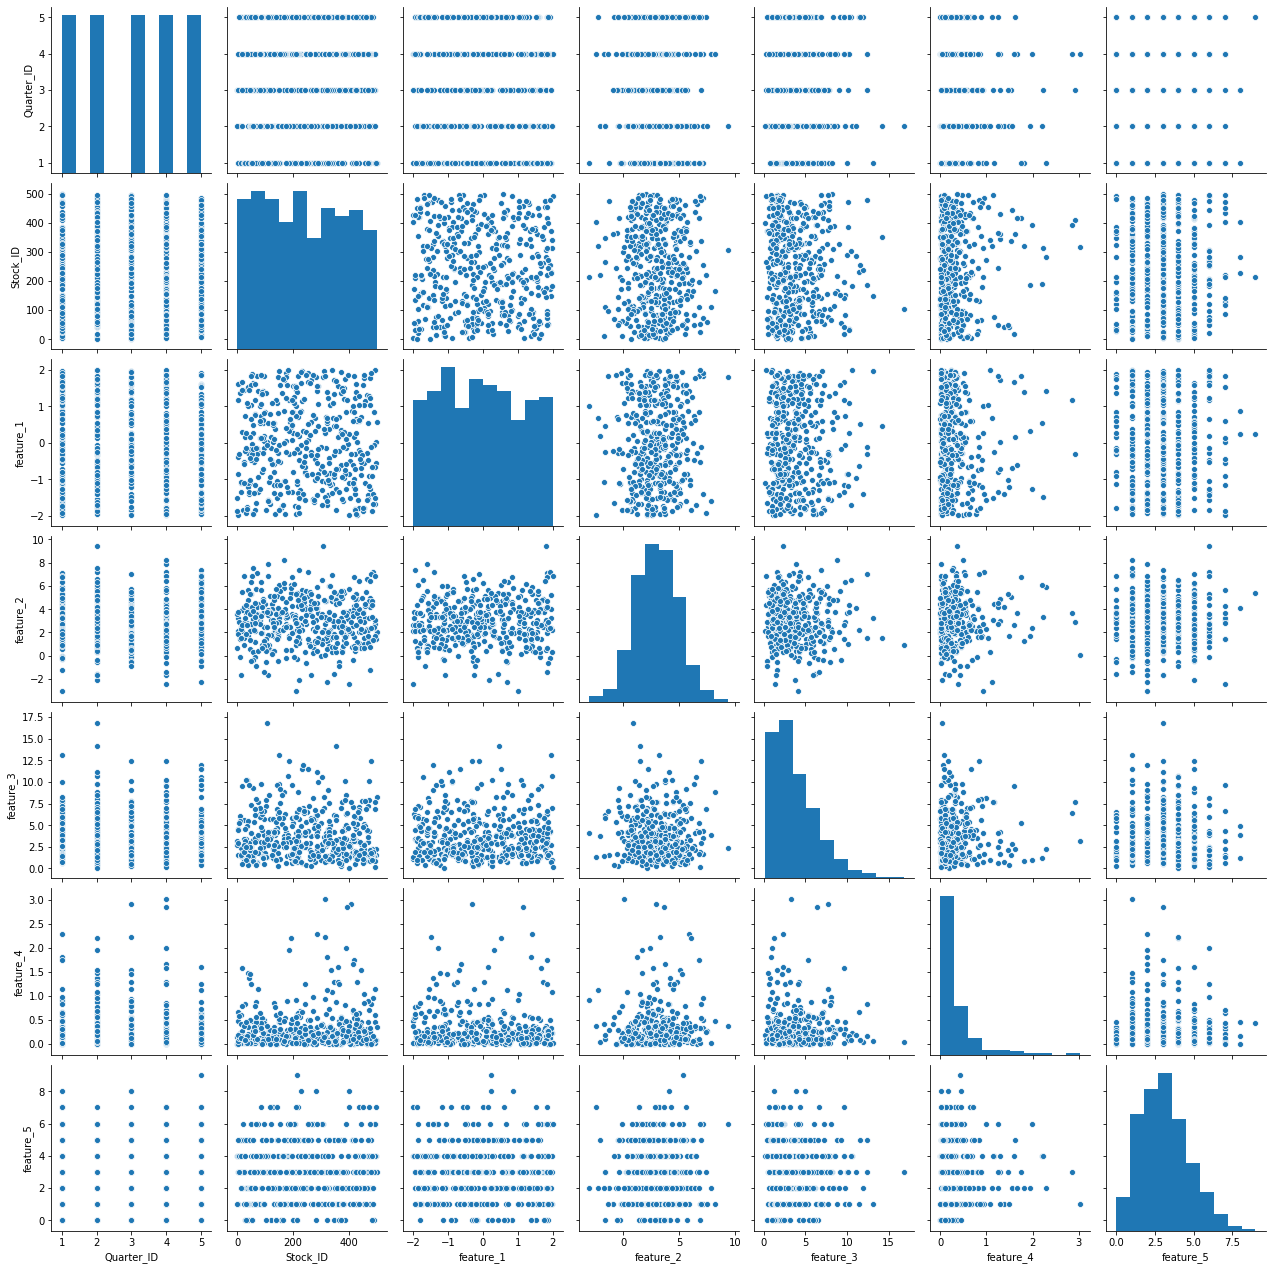

In [16]:
sns.pairplot(df)

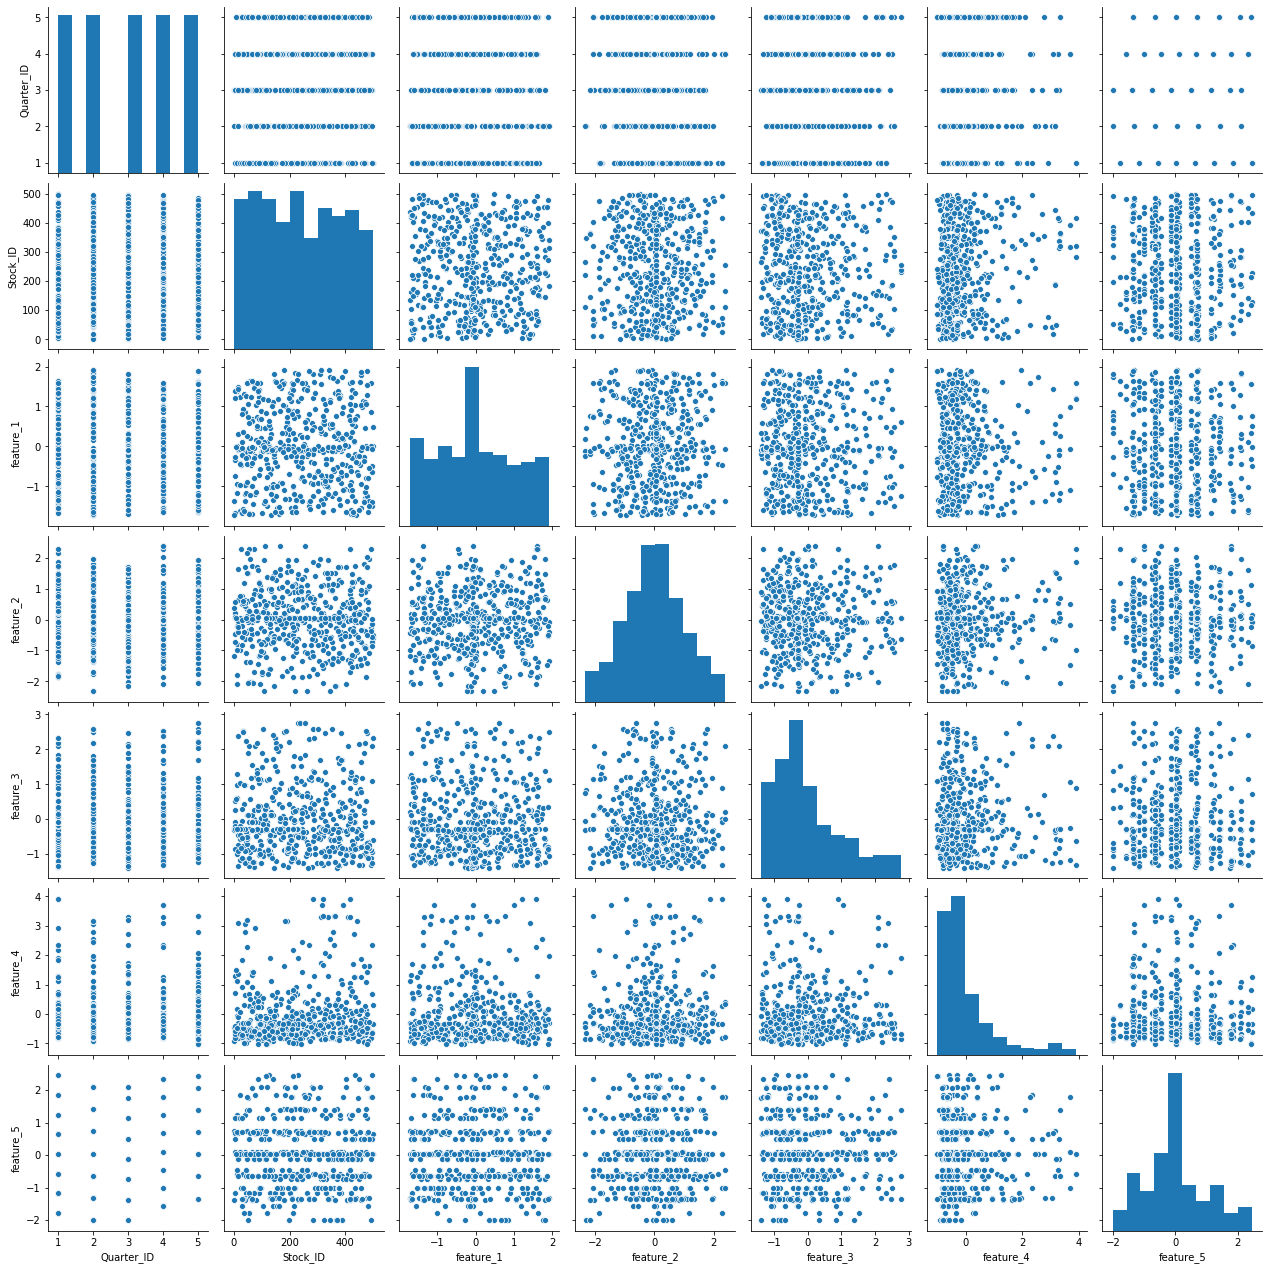

In [17]:
sns.pairplot(Quater_ID_1)

In [18]:
df.to_csv('Output1_ShubhamWarghade_20210403.csv')